In [105]:
import numpy as np
import pandas as pd
import scipy 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.utils import resample
!pip install kaggle
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
df=pd.read_csv("Data1.csv")
df

,Sno.,A,B,C,D,Circumference
0,1,238,240,120,76,8.4
1,2,113,220,181,242,10.2
2,3,254,177,108,113,10.8
3,4,259,0,117,102,9.1
4,5,350,7,90,102,8.8
5,6,169,94,95,106,9.3
6,7,234,217,108,127,10.4
7,8,325,201,114,123,8.2
8,9,253,157,102,101,8.3
9,10,270,193,230,231,11.0


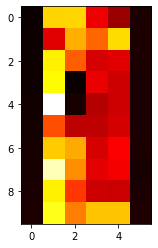

In [107]:
plt.imshow(df, cmap='hot', interpolation='nearest')
plt.show()

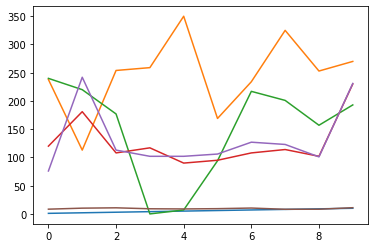

In [108]:
plt.plot(df)

In [109]:
X=df[['A','B','C','D']]
Y=df['Circumference']
print(X)
print(Y)

     A    B    C    D
0  238  240  120   76
1  113  220  181  242
2  254  177  108  113
3  259    0  117  102
4  350    7   90  102
5  169   94   95  106
6  234  217  108  127
7  325  201  114  123
8  253  157  102  101
9  270  193  230  231
0     8.4
1    10.2
2    10.8
3     9.1
4     8.8
5     9.3
6    10.4
7     8.2
8     8.3
9    11.0
Name: Circumference, dtype: float64


In [110]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3)

In [111]:
print(X_train)
print(X_test)

     A    B    C    D
9  270  193  230  231
7  325  201  114  123
6  234  217  108  127
2  254  177  108  113
4  350    7   90  102
0  238  240  120   76
5  169   94   95  106
     A    B    C    D
1  113  220  181  242
8  253  157  102  101
3  259    0  117  102


In [112]:
print(Y_train)
print(Y_test)

9    11.0
7     8.2
6    10.4
2    10.8
4     8.8
0     8.4
5     9.3
Name: Circumference, dtype: float64
1    10.2
8     8.3
3     9.1
Name: Circumference, dtype: float64


In [113]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [114]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [115]:
Y_pred1=lin_reg.predict(X_test)

In [116]:
print(Y_pred1)
print(Y_test)

[13.18  9.24  8.77]
1    10.2
8     8.3
3     9.1
Name: Circumference, dtype: float64


In [117]:
r2_score(Y_test,Y_pred1)

-4.410364835369654

In [139]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y_train)

LinearRegression()

In [140]:
Y_pred2=lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [141]:
print(Y_pred2)
print(Y_test)

[ 6.16 10.99 10.41]
1    10.2
8     8.3
3     9.1
Name: Circumference, dtype: float64


In [142]:
r2_score(Y_test,Y_pred2)

-12.905107150291252

In [122]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [123]:
Y_pred3=regressor.predict(X_test)

In [124]:
print(Y_pred3)
print(Y_test)

[11.  10.8  9.3]
1    10.2
8     8.3
3     9.1
Name: Circumference, dtype: float64


In [125]:
r2_score(Y_test,Y_pred3)

-2.8076923076923146

In [126]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [127]:
Y_pred4=regressor.predict(X_test)

In [128]:
print(Y_pred4)
print(Y_test)

[10.    9.67  9.66]
1    10.2
8     8.3
3     9.1
Name: Circumference, dtype: float64


In [129]:
r2_score(Y_test,Y_pred4)

-0.22554945054945108

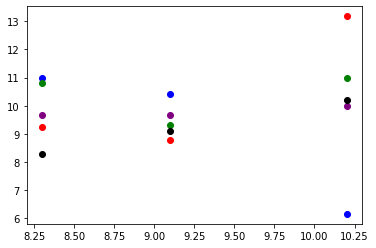

In [130]:
plt.scatter(Y_test, Y_pred1, color = 'red')
plt.scatter(Y_test, Y_pred2, color = 'blue')
plt.scatter(Y_test, Y_pred3, color = 'green')
plt.scatter(Y_test, Y_pred4, color = 'purple')
plt.scatter(Y_test, Y_test, color = 'black')
plt.show()